Dieses Jupyter Notebook wurde von Lisa Tawockli und Ruslan Adilgereev im Rahmen ihres Projekts erstellt. Es basiert auf dem Datensatz "wbdc_5.csv", der Merkmale aus Bildern einer Feinnadelbiopsie von Brusttumoren umfasst. Das Hauptziel dieses Projekts ist die Entwicklung eines präzisen Modells zur Klassifizierung von Brusttumoren in zwei Kategorien: gutartig (benign) und bösartig (malignant).

Um dieses Ziel zu erreichen, werden folgende maschinelle Lernalgorithmen angewendet und hinsichtlich ihrer Leistungsfähigkeit bewertet:
Multilayer Perceptron (MLP)
Entscheidungsbaum (Decision Tree)
Support Vector Machine (SVM)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Accuracy: 0.9900990099009901


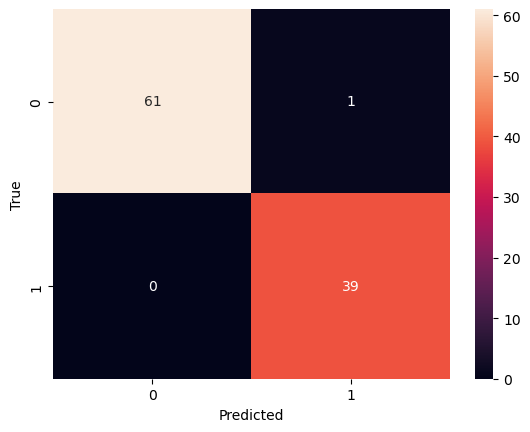

In [9]:
data = pd.read_csv('wbdc_5.csv')  # load data
data = data.dropna()  # drop missing values
data = data.drop(columns=['ID'])  # drop id column
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})  # convert diagnosis to binary

# split data into features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluate model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [4]:
data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,compactness1,concavity1,concave_points1,symmetry1,...,fractal_dimension2,radius3,texture3,perimeter3,area3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,897374,B,12.30,19.02,77.88,464.4,0.04202,0.007756,0.008535,0.1539,...,0.002222,13.35,28.46,84.53,544.3,0.09052,0.03619,0.03983,0.2554,0.07207
1,8910251,B,10.60,18.95,69.28,346.4,0.11470,0.063870,0.026420,0.1922,...,0.003318,11.88,22.94,78.28,424.8,0.25150,0.19160,0.07926,0.2940,0.07587
2,854941,B,13.03,18.42,82.61,523.8,0.03766,0.025620,0.029230,0.1467,...,0.001777,13.30,22.81,84.46,545.9,0.04619,0.04833,0.05013,0.1987,0.06169
3,89869,B,14.76,14.74,94.87,668.7,0.07780,0.046080,0.035280,0.1521,...,0.002783,17.27,17.93,114.20,880.8,0.20090,0.21510,0.12510,0.3109,0.08187
4,9113538,M,17.60,23.33,119.00,980.5,0.20040,0.213600,0.100200,0.1696,...,0.011300,21.57,28.87,143.60,1437.0,0.47850,0.51650,0.19960,0.2301,0.12240
